<a href="https://colab.research.google.com/github/sheldonkemper/portfolio/blob/main/CAM_DS_C101_Activity_2_2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First things first** - please go to 'File' and select 'Save a copy in Drive' so that you have your own version of this activity set up and ready to use.
Remember to update the portfolio index link to your own work once completed!

# Activity 2.2.3 Interpreting correlation

## Scenario
You are a data analyst working for a large investment firm in London. The organisation is considering offering medical insurance as an employment benefit, but the management team needs to consider the potential cost of claims before they make any decisions. The team has received quotes from five medical insurers, and the cost of the insurance varies widely.

One insurer has delivered a very competitive quote, but the downside is that the cost per person would vary depending on certain criteria set by the insurance company. These criteria include smoking status and body mass index (BMI). The insurance would be affordable for all non-smokers and those with a BMI in the range of 18–24, but any employee outside of these categories would have to pay an additional monthly contribution. This may lead to the management team being accused of bias against these employees, as some employees would receive free insurance while others would have to pay.

Your company is considering developing more targeted insurance plans and policies based on individual lifestyles. This would involve offering incentives for healthier living or adjusting premiums based on certain lifestyle choices. However, before implementing these changes, the company wants to gather evidence of any correlations between lifestyle choices and insurance costs.
Your organisation would like to be able to evidence the impact of lifestyle choices on the medical insurance costs so that it can explain why some employees would have to pay extra to be in the scheme. To gather this evidence, it would like to explore the correlations between lifestyle choices and potential insurance costs.

The data set includes demographic data (age and sex) and health and lifestyle data (BMI, number of children, and smoker status). The management team would like you to explore which of these factors would have a significant effect on insurance costs.


## Objective
Your goal is to identify correlations in an anonymised data set that contains information about individuals and their medical insurance costs.


## Assessment criteria
By completing this activity, you will be able to provide evidence that you can:
*   Investigate data systematically to identify links and account for biases.
*   Interpret statistical test results rigorously, identifying and addressing assumptions and limitations


## Activity guide
1. **Libraries and data:**
Import the necessary Python libraries and run the cell to load the data set.
2. **Data exploration:**
Explore the data set.
Calculate descriptive statistics and create visualisations (scatter plots, histograms, etc.).
Gain a general understanding of the data.
3. **Statistical testing:**
Conduct a correlation analysis on the specified variables using Python libraries such as Pandas and NumPy.
Calculate correlation coefficients (e.g. Pearson or Spearman) and p-values.
4. **Interpretation:**
Interpret the correlation coefficients and p-values.
5. **State limitations:**
Describe the limitations of correlation analysis.
Consider potential biases affecting interpretation.
6. **Reflecting and documenting:**
Reflect on findings.
Describe the entire analysis process, including exploration, statistical testing, and interpretation.
Mention any assumptions and limitations in the analysis.

> Start your activity here. Select the pen from the toolbar to add your entry.

In [2]:
# Import libraries
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt #Visualisation
import seaborn as sns #Visualisation

data = pd.read_csv("https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/insurance.csv")
data.head()

,age,bmi,number_of_children,smoker,charges
0,47,29.45,1,0,25000
1,34,32.14,0,0,24666
2,39,21.62,1,0,18301
3,52,25.84,1,0,19252
4,48,26.82,1,0,24014


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1000 non-null   int64  
 1   bmi                 1000 non-null   float64
 2   number_of_children  1000 non-null   int64  
 3   smoker              1000 non-null   int64  
 4   charges             1000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


In [4]:
data['smoker'] = data['smoker'].astype(int)
data['age'] = data['age'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 1000 non-null   int64  
 1   bmi                 1000 non-null   float64
 2   number_of_children  1000 non-null   int64  
 3   smoker              1000 non-null   int64  
 4   charges             1000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 39.2 KB


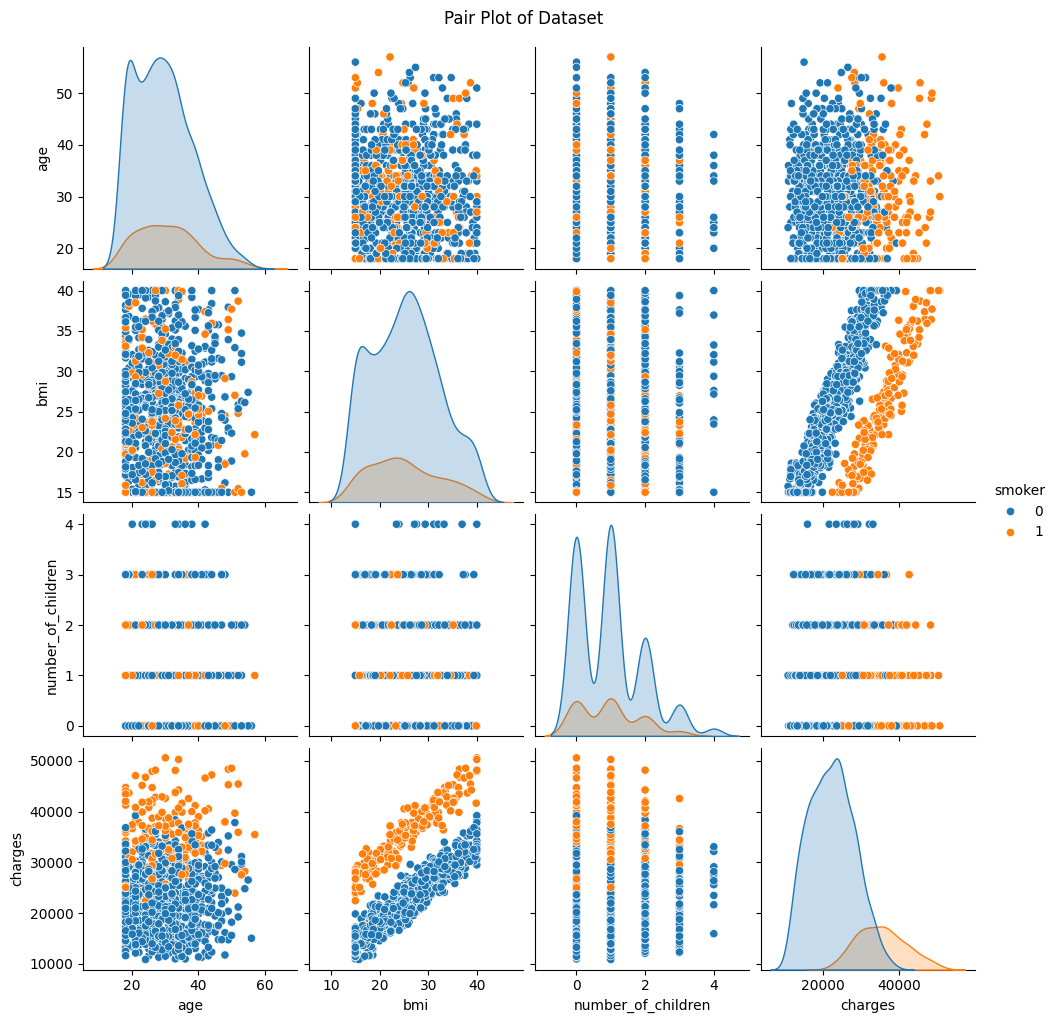

In [5]:
# Map the 'smoker' column to a categorical type for better visualization
# Create a pair plot
sns.pairplot(data, hue='smoker', diag_kind='kde')

# Display the plot
plt.suptitle('Pair Plot of Dataset', y=1.02)
plt.show()

Text(0.5, 1.0, 'Pearson correlation')

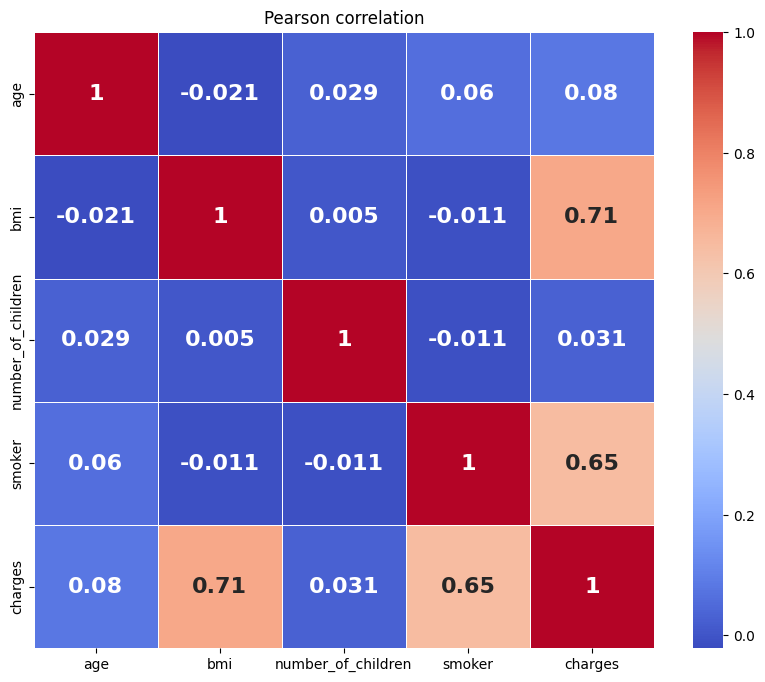

In [6]:
# Import the required library.
from scipy.stats import pearsonr
# Visualise using a correlation matrix heatmap.
plt.figure(figsize=(10, 8))
corr_matrix_pearson = data.corr(method='pearson')

sns.heatmap(corr_matrix_pearson,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            annot_kws={"fontsize": 16, "fontweight": "bold"})

plt.title('Pearson correlation')

In [7]:
# Import the required library.
from scipy.stats import pearsonr

# Calculate Pearson correlation.
pearson_corr, pearson_p_value = pearsonr(data['charges'],
                                         data['bmi'])

# View the output.
print("\nPearson correlation coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p_value)


Pearson correlation coefficient: 0.7087713530017028
Pearson p-value: 2.0579566103102778e-153


<h4><strong>Objective</strong></h4>
<p>To determine the correlation between insurance charges and BMI.</p>

<h4><strong>Test Statistics</strong></h4>
<p>
    <strong>Pearson Correlation Coefficient:</strong> 0.7087713530017028<br>
    <strong>P-Value:</strong> 2.0579566103102778e-153
</p>

<h4><strong>Decision</strong></h4>
<p>Since the P-Value (2.0579566103102778e-153) is much smaller than the significance level (typically 0.05), we reject the null hypothesis that there is no correlation between insurance charges and BMI.</p>

<h4><strong>Conclusion</strong></h4>
<p>The analysis indicates that there is a strong and statistically significant positive correlation between insurance charges and BMI. This means that as BMI increases, the insurance charges also tend to increase.</p>


In [8]:
# Import the required library.
from scipy.stats import pearsonr

# Calculate Pearson correlation.
pearson_corr, pearson_p_value = pearsonr(data['charges'],
                                         data['smoker'])

# View the output.
print("\nPearson correlation coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p_value)



Pearson correlation coefficient: 0.6459429037873878
Pearson p-value: 3.7154707874395917e-119


<h4><strong>Objective</strong></h4>
<p>To determine the correlation between insurance charges and smoking status.</p>

<h4><strong>Test Statistics</strong></h4>
<p>
    <strong>Pearson Correlation Coefficient:</strong> 0.6459429037873878<br>
    <strong>P-Value:</strong> 3.7154707874395917e-119
</p>

<h4><strong>Decision</strong></h4>
<p>Since the P-Value (3.7154707874395917e-119) is much smaller than the significance level (typically 0.05), we reject the null hypothesis that there is no correlation between insurance charges and smoking status.</p>

<h4><strong>Conclusion</strong></h4>
<p>The analysis indicates that there is a strong and statistically significant positive correlation between insurance charges and smoking status. This means that being a smoker is associated with higher insurance charges.</p>


<h2>Final result</h2>
<h4><strong>Objective</strong></h4>
<p>To determine which variable, BMI or smoking status, has a stronger relationship with insurance charges.</p>

<h4><strong>Test Statistics</strong></h4>
<p>
    <strong>Pearson Correlation Coefficient between charges and BMI:</strong> 0.7087713530017028<br>
    <strong>Pearson P-Value between charges and BMI:</strong> 2.0579566103102778e-153<br>
    <strong>Pearson Correlation Coefficient between charges and smoking status:</strong> 0.6459429037873878<br>
    <strong>Pearson P-Value between charges and smoking status:</strong> 3.7154707874395917e-119
</p>

<h4><strong>Decision</strong></h4>
<p>Since the Pearson correlation coefficient between charges and BMI (0.7088) is greater than that between charges and smoking status (0.6459), BMI has a stronger relationship with insurance charges than smoking status.</p>

<h4><strong>Conclusion</strong></h4>
<p>The analysis indicates that BMI has a stronger and statistically significant positive correlation with insurance charges compared to smoking status. Therefore, as BMI increases, insurance charges also tend to increase more strongly than with smoking status.</p>


Text(0.5, 1.0, 'Spearman correlation')

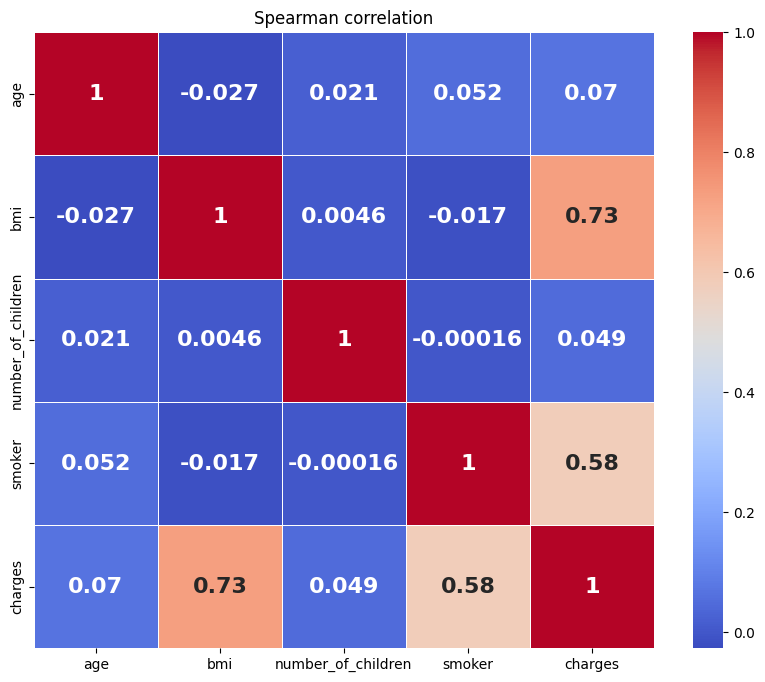

In [9]:
# Visualise using a correlation matrix heatmap.
plt.figure(figsize=(10, 8))
corr_matrix_spearman = data.corr(method='spearman')

sns.heatmap(corr_matrix_spearman,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5,
            annot_kws={"fontsize": 16, "fontweight": "bold"})

plt.title('Spearman correlation')

In [11]:
# Import the required library.
from scipy.stats import spearmanr

# Calculate the Spearman correlation.
spearman_corr, spearman_p_value = spearmanr(data['charges'],
                                            data['bmi'])

# View the output.
print("\nSpearman correlation coefficient:", spearman_corr)
print("Spearman p-value:", spearman_p_value)


Spearman correlation coefficient: 0.7279870957406159
Spearman p-value: 8.563063168075445e-166


In [12]:
# Import the required library.
from scipy.stats import spearmanr

# Calculate the Spearman correlation.
spearman_corr, spearman_p_value = spearmanr(data['charges'],
                                            data['smoker'])

# View the output.
print("\nSpearman correlation coefficient:", spearman_corr)
print("Spearman p-value:", spearman_p_value)


Spearman correlation coefficient: 0.5815550320440511
Spearman p-value: 1.504650916198095e-91


# Reflect

To determine which variable, BMI or smoking status, has a stronger relationship with insurance charges, I began by visualizing the data using a heatmap and a pairplot. The heatmap provided an initial overview of the correlation between all variables, highlighting the strength and direction of their relationships through color gradients. This visual aid helped identify potential significant relationships worth exploring further. The pairplot allowed for a detailed examination of pairwise relationships and distributions, facilitating the identification of trends and patterns. Following these visual inspections, I computed the Pearson correlation coefficients for both 'bmi' and 'smoker' with respect to 'charges'. The Pearson correlation coefficient quantifies the linear relationship between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation). The correlation between 'charges' and 'bmi' was found to be 0.7088, indicating a strong positive relationship, while the correlation between 'charges' and 'smoker' was 0.6459, indicating a positive but weaker relationship. By comparing these coefficients, I concluded that BMI has a stronger relationship with insurance charges than smoking status. This structured approach, combining visual exploration with quantitative analysis, demonstrates critical thinking and effective problem-solving in identifying key factors influencing insurance charges.